# Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load Dataset

In [ ]:
train_path = "/content/drive/MyDrive/Final_Project_ML_OL/data/train.csv"
test_path  = "/content/drive/MyDrive/Final_Project_ML_OL/data/test.csv"

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

train.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

Structure of Data

In [ ]:
train.info()
train.describe()
train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

# Visualizations

Missing Values

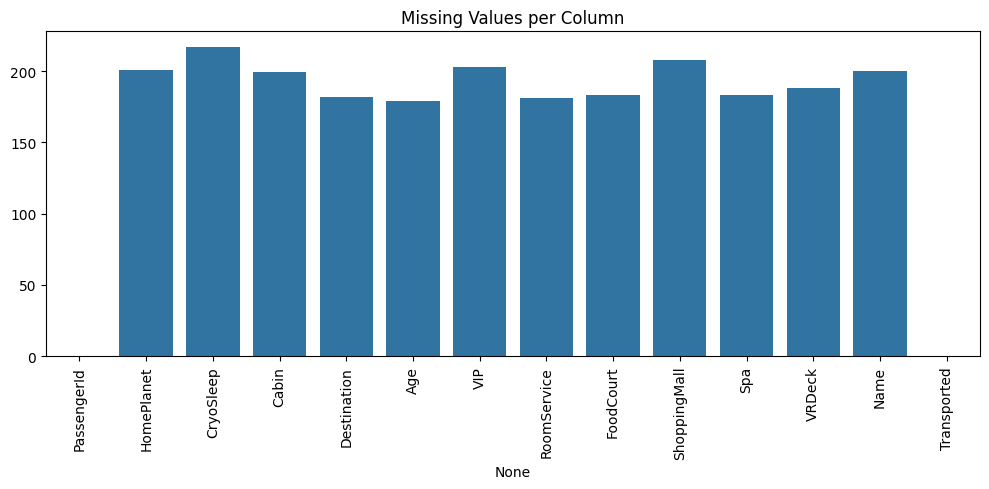

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=train.isna().sum().index, y=train.isna().sum().values)
plt.xticks(rotation=90)
plt.title("Missing Values per Column")
plt.tight_layout()

plt.savefig("/content/drive/MyDrive/Final_Project_ML_OL/report_images/missing_values.png")
plt.show()

EDA Plots

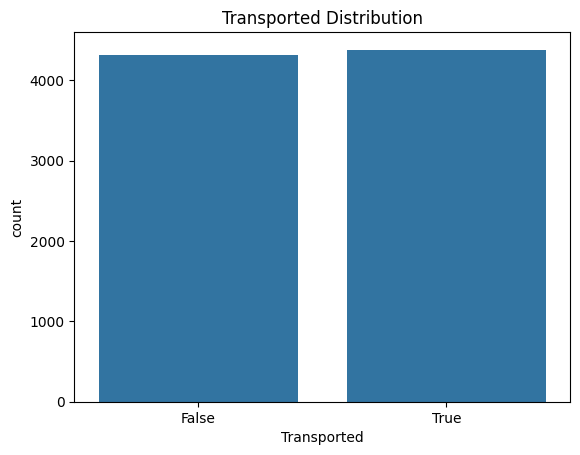

In [ ]:
sns.countplot(data=train, x='Transported')
plt.title("Transported Distribution")
plt.savefig("/content/drive/MyDrive/Final_Project_ML_OL/report_images/transported_dist.png")
plt.show()

Numerical Features

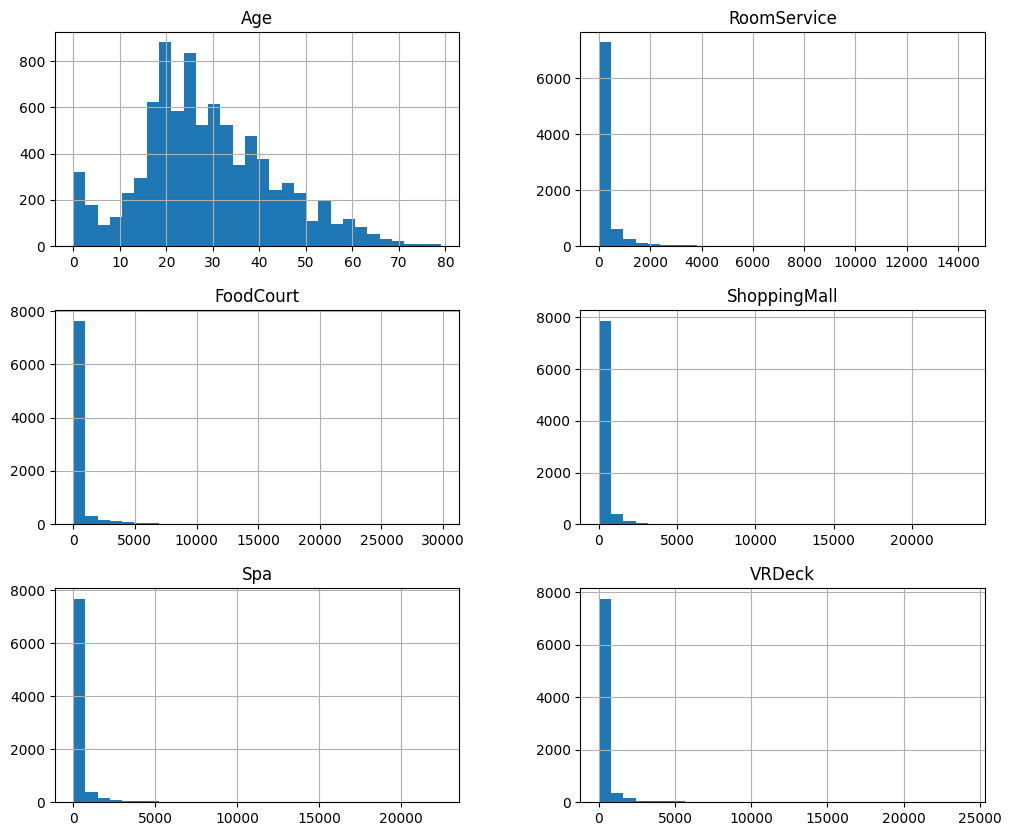

In [ ]:
numeric_cols = ["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

train[numeric_cols].hist(bins=30, figsize=(12,10))
plt.savefig("/content/drive/MyDrive/Final_Project_ML_OL/report_images/numeric_hists.png")
plt.show()

Categorical Features

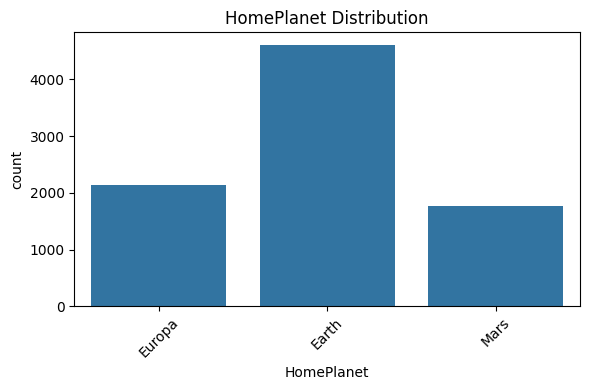

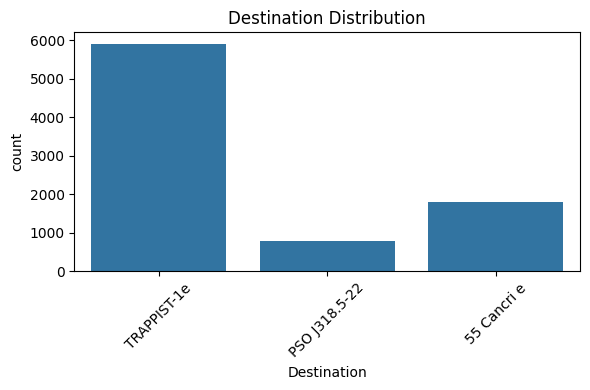

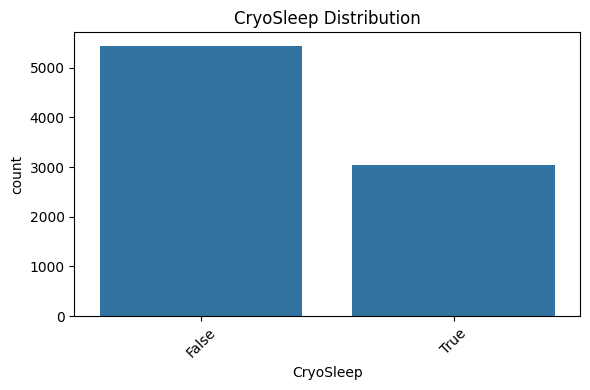

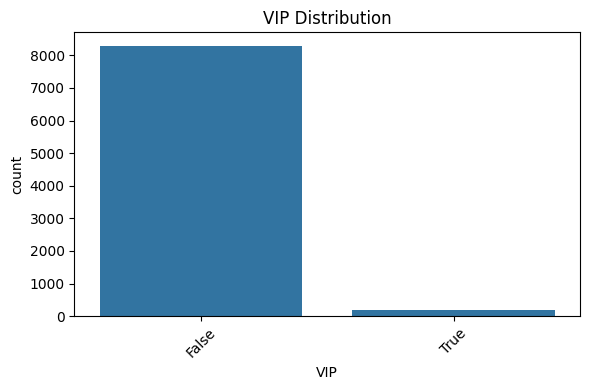

In [ ]:
cat_cols = ["HomePlanet","Destination","CryoSleep","VIP"]

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=train, x=col)
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"/content/drive/MyDrive/Final_Project_ML_OL/report_images/{col}_dist.png")
    plt.show()

Correlation Heatmap

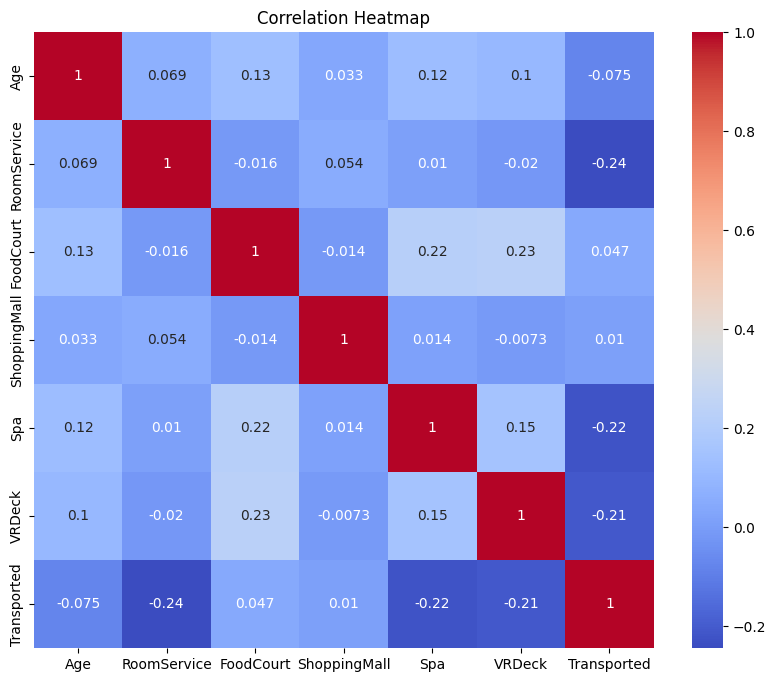

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(train[numeric_cols + ['Transported']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig("/content/drive/MyDrive/Final_Project_ML_OL/report_images/correlation.png")
plt.show()

Feature Engineering

In [ ]:
cabin_split = train['Cabin'].str.split('/', expand=True)
train['Deck'] = cabin_split[0]
train['CabinNum'] = cabin_split[1].astype(float)
train['Side'] = cabin_split[2]
train[['Cabin','Deck','CabinNum','Side']].head()

Cabin Deck  CabinNum Side
0  B/0/P    B       0.0    P
1  F/0/S    F       0.0    S
2  A/0/S    A       0.0    S
3  A/0/S    A       0.0    S
4  F/1/S    F       1.0    S

In [ ]:
train['GroupID'] = train['PassengerId'].str.split('_').str[0]
group_sizes = train['GroupID'].value_counts()
train['GroupSize'] = train['GroupID'].map(group_sizes)
train[['PassengerId','GroupID','GroupSize']].head()

PassengerId GroupID  GroupSize
0     0001_01    0001          1
1     0002_01    0002          1
2     0003_01    0003          2
3     0003_02    0003          2
4     0004_01    0004          1

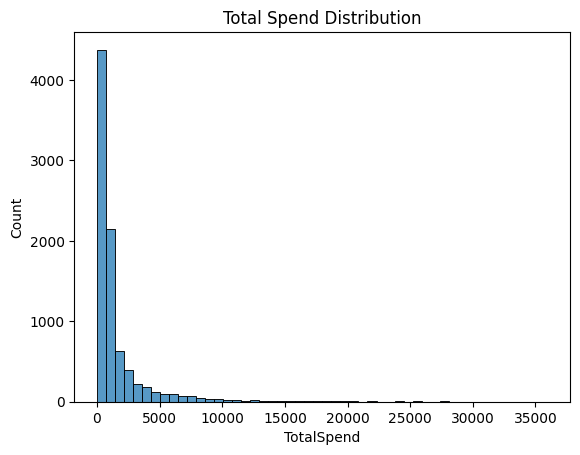

In [ ]:
spend_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
train["TotalSpend"] = train[spend_cols].sum(axis=1)

sns.histplot(train['TotalSpend'], bins=50)
plt.title("Total Spend Distribution")
plt.savefig("/content/drive/MyDrive/Final_Project_ML_OL/report_images/total_spend.png")
plt.show()